<a href="https://colab.research.google.com/github/RufinoMartin/Diabetes/blob/main/Diabetes_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


**Diabetes** is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. (WHO)

**Epidemiology:** about 422 million people worldwide have diabetes. Since diabetes affects a large population across the globe and the collection of these datasets is a continuous process and it comprises of various patient related attributes such as age, gender, symptoms, insulin levels, blood pressure, blood glucose levels, weight etc. 

**Dataset:** Pima Indians Diabetes Dataset (PIDD), extracted from the University of California, Irvine (UCI) machine learning repository.
( [https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database](https://) )

**Population:** Pima People are North American Indians who traditionally lived along the Gila and Salt rivers in Arizona, U.S., in what was the core area of the prehistoric Hohokam culture



# Library Import

In [1]:
# Data management

import pandas as pd
import numpy as np

# Visualizations

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from seaborn import distplot
from seaborn import boxplot
from seaborn import violinplot

# Warnings

import warnings
warnings.filterwarnings('ignore')

# Data Acquisition

RAW Url from repository to run notebook : https://github.com/RufinoMartin/Diabetes/blob/main/diabetes.csv


In [2]:
# Data Load

df = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/Diabetes/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Wrangling

In [3]:
# Rename DiabetesPedigreeFunction column to DPF for practical purposes

df.rename(columns={'DiabetesPedigreeFunction':'DPF'}, inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Variable type conversion: DPF to Integer.

df["DPF"] = pd.to_numeric(df["DPF"])

In [5]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [6]:
# Rename 'Outcome' booleans: 1 to 'Diab' & 0 to'Non-Diab'

df.Outcome = df.Outcome.replace({0:'Non-Diab',1:'Diab'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diab
1,1,85,66,29,0,26.6,0.351,31,Non-Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
3,1,89,66,23,94,28.1,0.167,21,Non-Diab
4,0,137,40,35,168,43.1,2.288,33,Diab


In [7]:
# Dataframe dimension (rows, columns)
df.shape

(768, 9)

In [8]:
# Data Types

df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome           object
dtype: object

In [9]:
# Fields x Column

df.count()

Pregnancies      768
Glucose          768
BloodPressure    768
SkinThickness    768
Insulin          768
BMI              768
DPF              768
Age              768
Outcome          768
dtype: int64

In [10]:
# More Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [11]:
# Basic Statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [12]:
# Pivoting describe function for better perspective

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


# Data Summary

- Health-Sector related dataset: Presence of variables among a Diabetic and Non Diabetic Population. 
- 768 fields & 9 variables.
- No missing values. 

## Variable definition: 

- Pregnancies: Number of times pregnant.

- Glucose: set in mg/dL.

- Blood pressure: set in mm/Hg. Likely DBP (diastolic blood pressure) based on numbers.

- Skinthickness: Number of mm that triceps skin-fold.

- Insulin: set in mu U/ml.

- BMI: set in kg/m2

- DPF: (DiabetesPedigree) likelihood of having diabetes based on familial history

- Age: set in years

- Outcome: Diabetic & Non-Diabetic (Target Variable)

# Univariate Exploratory Analysis

We proceed to inspect interesting isolated variables, in order to get a glimpse of it value´s distribution throughout the dataframe.

## Pregnancies

In [13]:
df.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

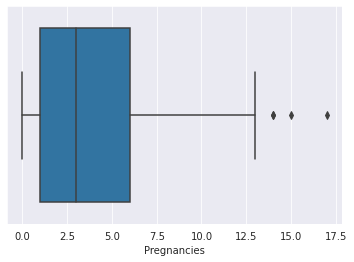

In [14]:

boxplot(df.Pregnancies, orient="v")

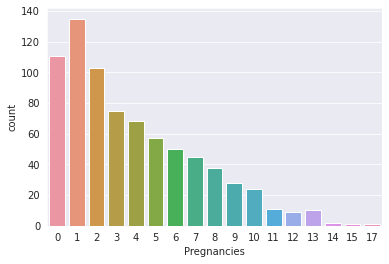

In [15]:
sns.countplot(df['Pregnancies'])

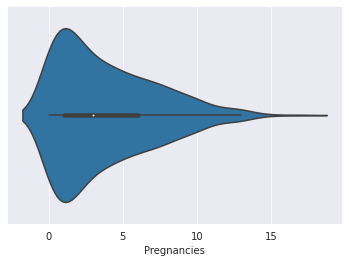

In [16]:
from seaborn import violinplot
violinplot(df.Pregnancies, data=df , orient="v")

## Glucose 

In [17]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

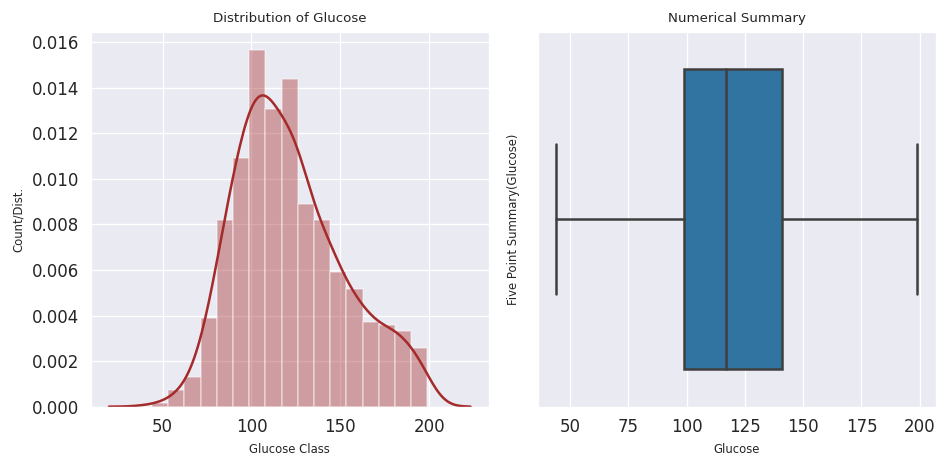

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Glucose']!=0]['Glucose'],ax=axes[0],color='brown')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

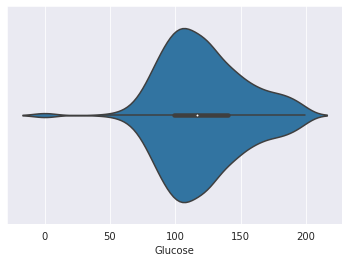

In [19]:
from seaborn import violinplot
violinplot(df.Glucose, data=df , orient="v")

## Blood Pressure

In [20]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

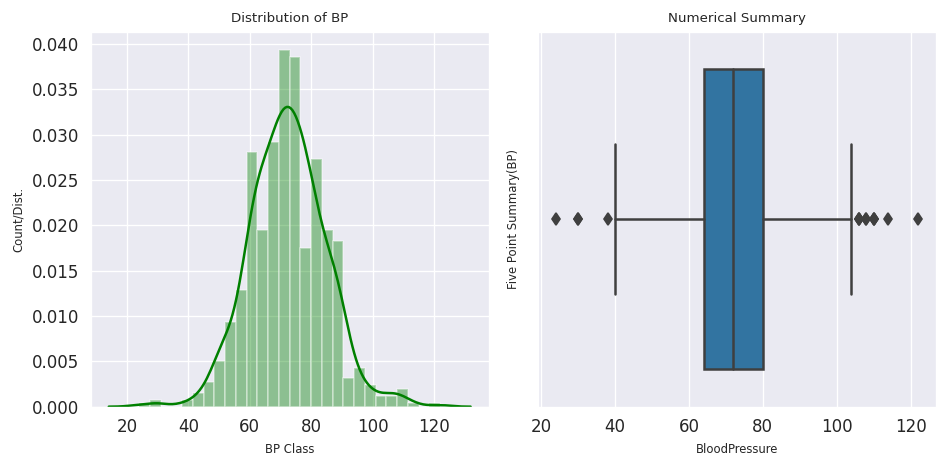

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

## SkinThickness

In [22]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

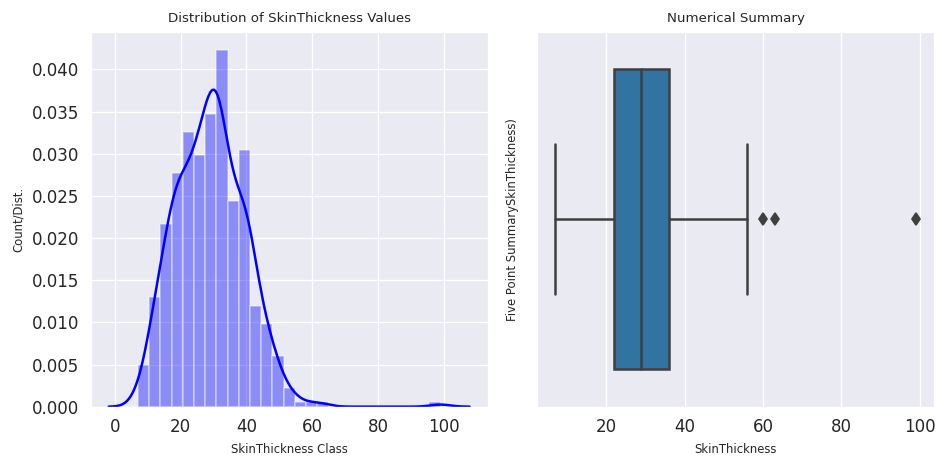

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[0],color='blue')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of SkinThickness Values',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point SummarySkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()

## Insulin

In [24]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

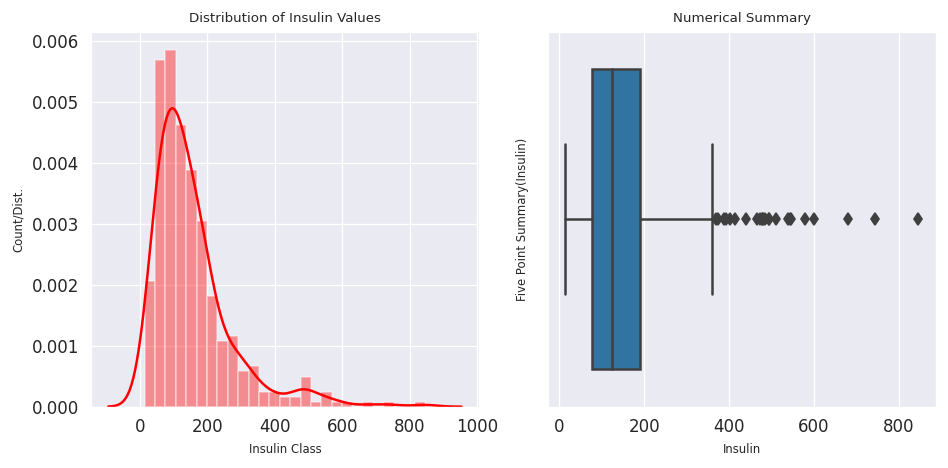

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Insulin']!=0]['Insulin'],ax=axes[0],color='red')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Insulin Values',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Insulin']!=0]['Insulin'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Insulin',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Insulin)',fontdict={'fontsize':7})
plt.tight_layout()

## BMI

In [26]:
df.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

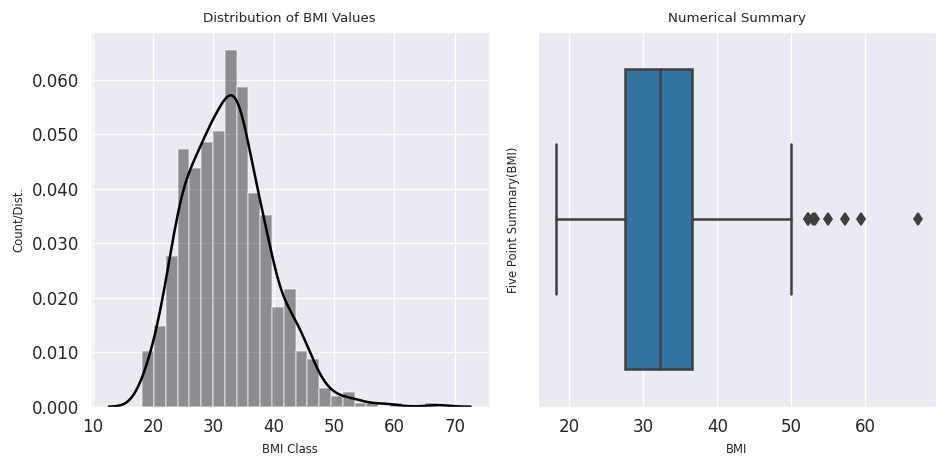

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BMI']!=0]['BMI'],ax=axes[0],color='black')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BMI Values',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BMI']!=0]['BMI'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BMI',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BMI)',fontdict={'fontsize':7})
plt.tight_layout()

## DPF (Diabetes Pedigree Familiar)

In [28]:
df.DPF.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DPF, dtype: float64

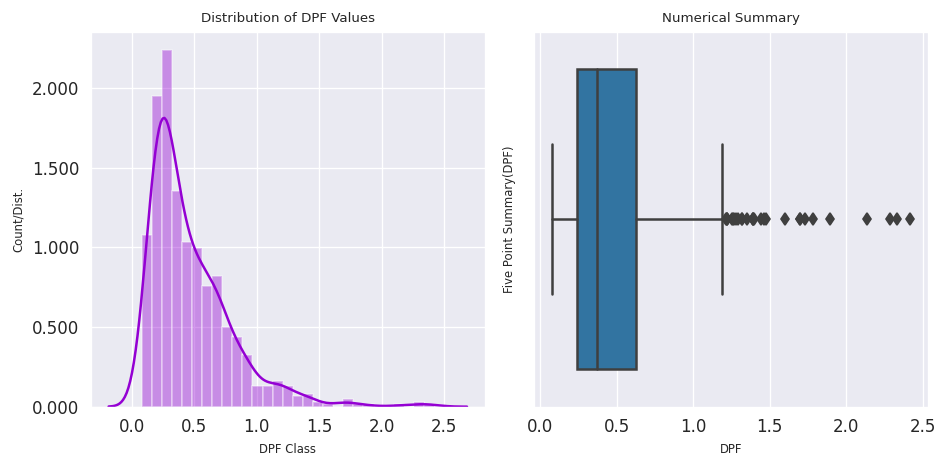

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['DPF']!=0]['DPF'],ax=axes[0],color='darkviolet')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of DPF Values',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['DPF']!=0]['DPF'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('DPF',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(DPF)',fontdict={'fontsize':7})
plt.tight_layout()

Annotations for further analysis: The DPF and Insulin plots look much alike, filled with right-handed outlierts. 

## Age

In [30]:
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

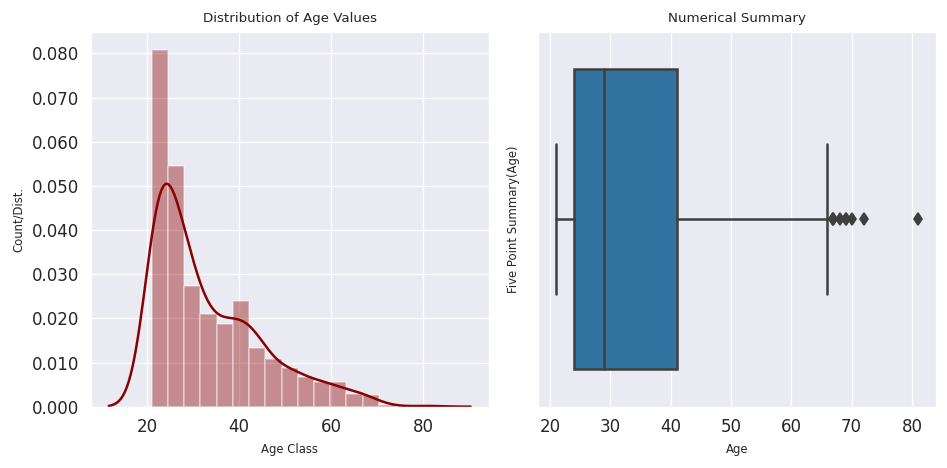

In [31]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Age']!=0]['Age'],ax=axes[0],color='darkred')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Age Values',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Age']!=0]['Age'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Age',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Age)',fontdict={'fontsize':7})
plt.tight_layout()

Annotations: The population its remarkably asymmetric: most sample values belong to youngsters. Key to further analysis. 

## Outcome: Diabetic & Non-Diabetic

In [32]:
df_Outcome = df['Outcome'].value_counts()
df_Outcome

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64

In [33]:
# Lets calculate the prevalence %

quotient = 268 / 768
percent = quotient * 100
print("The % of Diabetes in the sample is" , percent)

The % of Diabetes in the sample is 34.89583333333333


Meaning 1/3 of Pima Indians individuals sample sufferered from diabetes at the time.

([<matplotlib.patches.Wedge at 0x7f5e59c41350>,
 [Text(-0.5025943242672991, 0.9784676515931925, ''),
  Text(0.5025944158780503, -0.9784676045369114, '')])

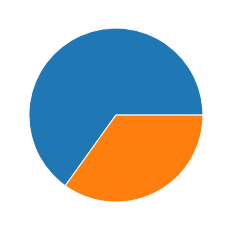

In [34]:
plt.pie(df_Outcome) # To rapidly apreciate the proportions

# Multivariate Exploratory Analysis

## Pairplots

Paitplots offer rapid insights on relationships between all included variables in dataset.



<Figure size 720x480 with 0 Axes>

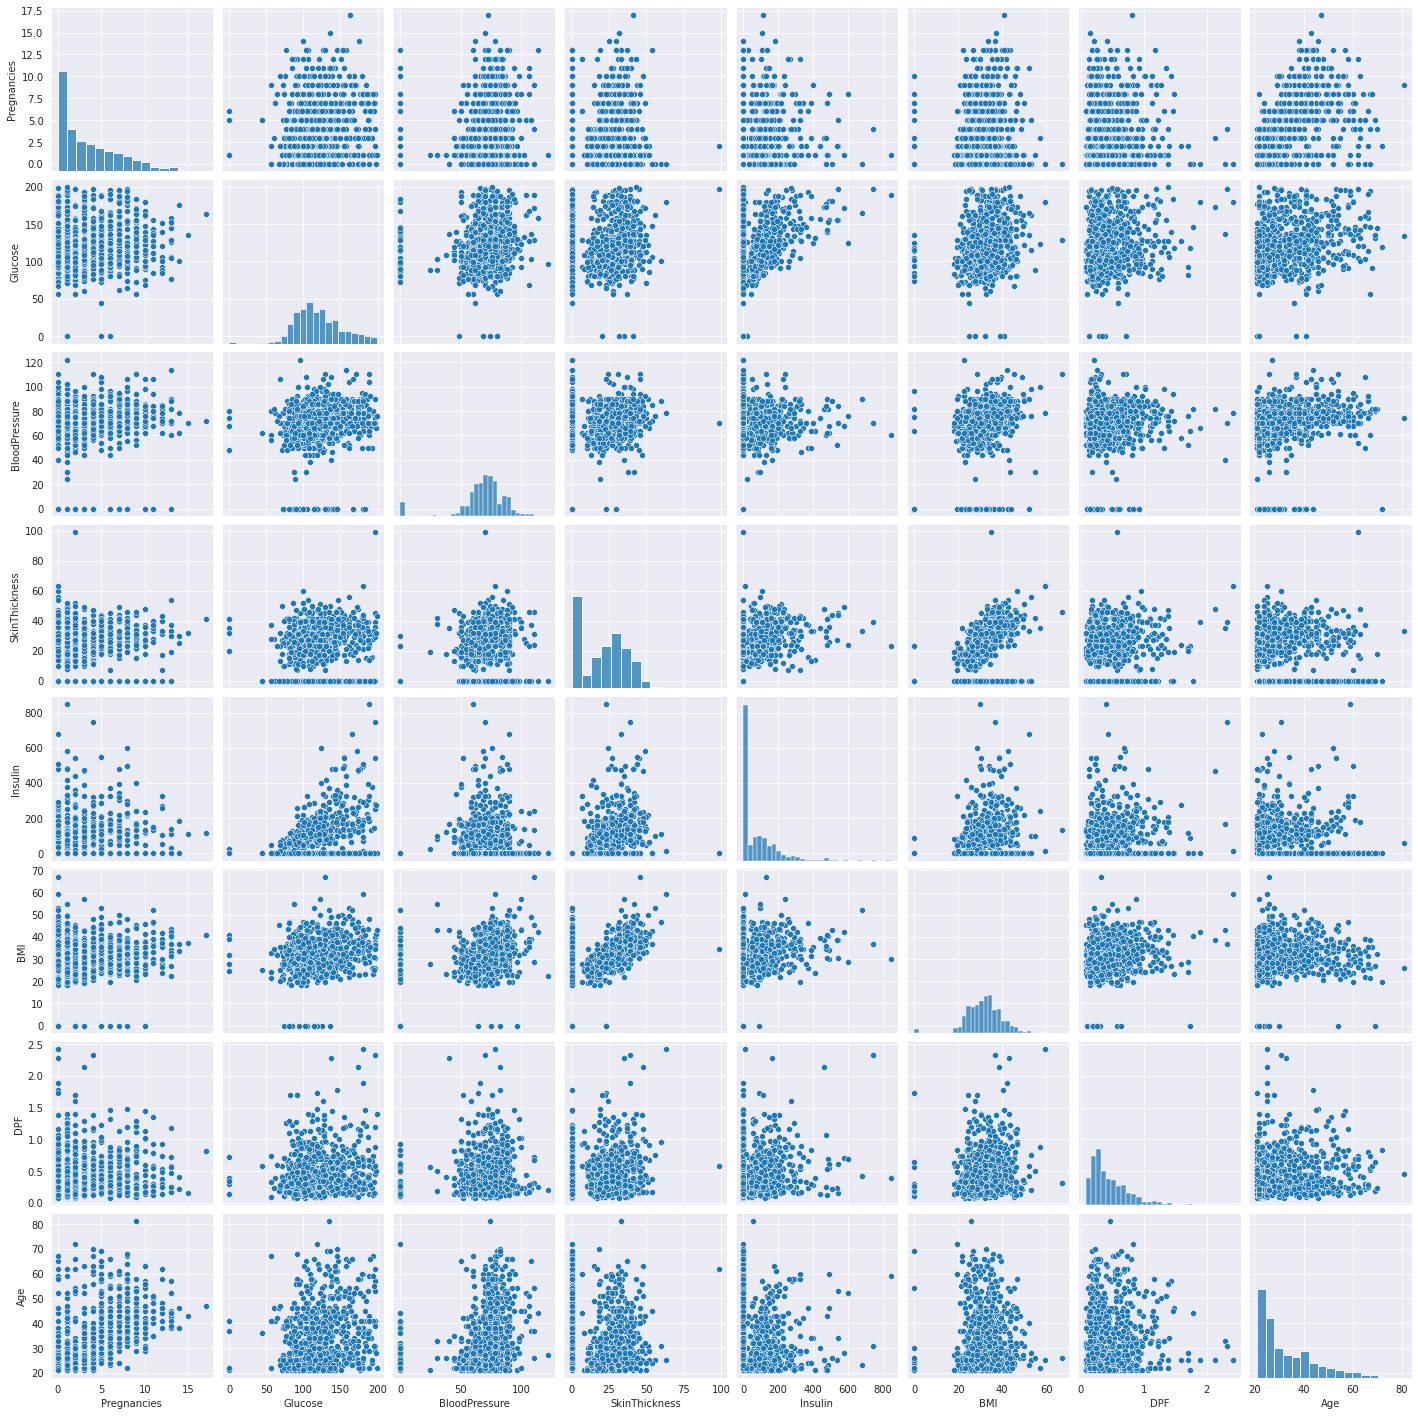

In [35]:
# First Pairplot 

plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

<Figure size 720x480 with 0 Axes>

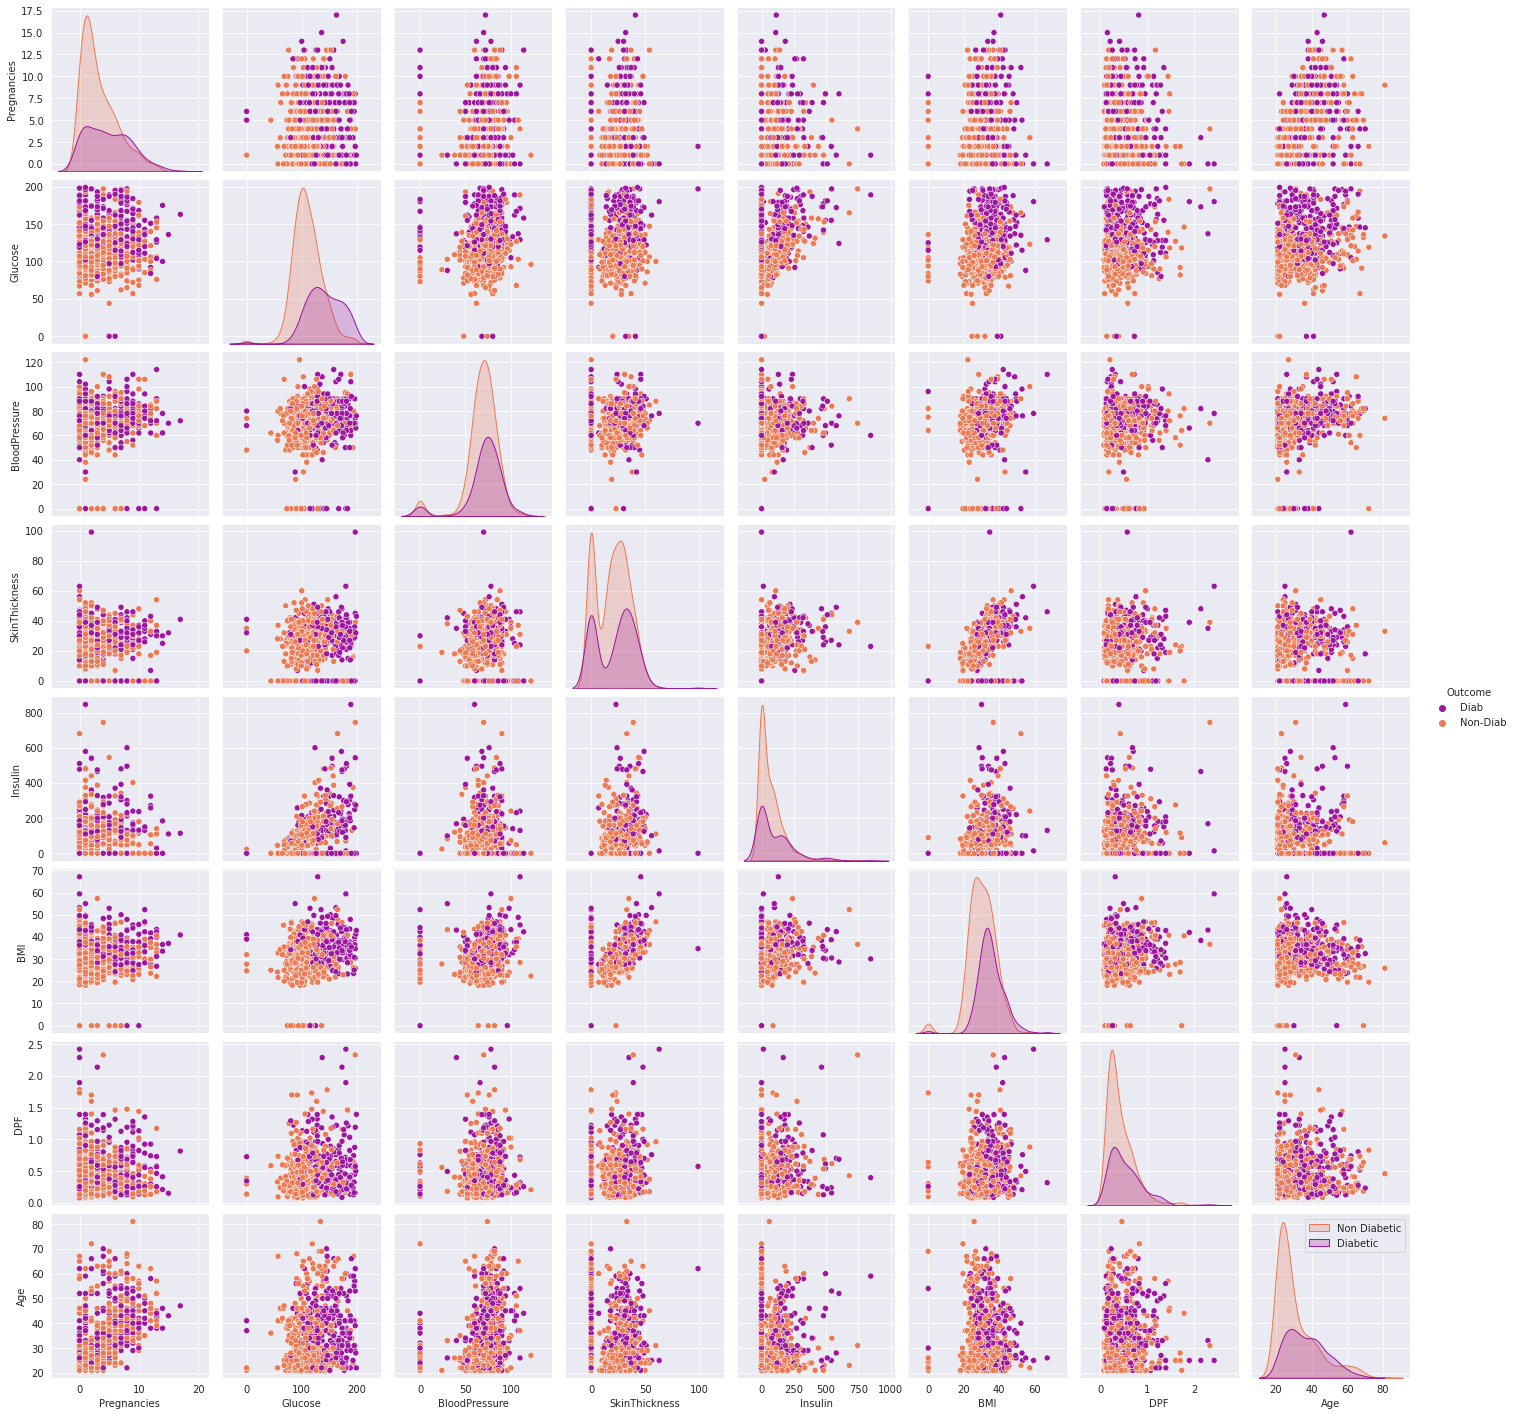

In [36]:
# Second Pairplot but using "Outcome" as the hue, 
#  so we should see more clearly the division lines between "Diabetic" and "Non Diabetic"

plt.figure(dpi = 120)
sns.pairplot(df,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

Ideally, what we would love to see as of diagnostic purposes, are two well-defined, separated color clusters. Its eye-catching that thats not the case: there is presumably no "responsible-variable" for a Diabetes-positive-Outcome. 
Nonetheless, we will develop more focalized further analysis from this plot´s invitation. 

Insulin x Age seems like a great start. 

<Figure size 1800x1200 with 0 Axes>

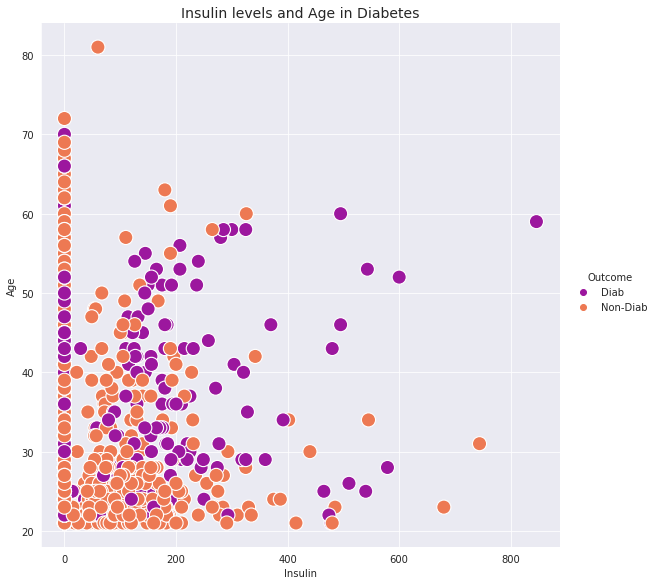

In [37]:
plt.figure(dpi = 300)
sns.pairplot(df, hue='Outcome', palette='plasma',x_vars='Insulin', y_vars='Age', size=8, plot_kws={"s": 200})
plt.title("Insulin levels and Age in Diabetes", fontsize=14)
plt.show()

## Heatmap

Heatmaps are the visual representation of Correlation, a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables.

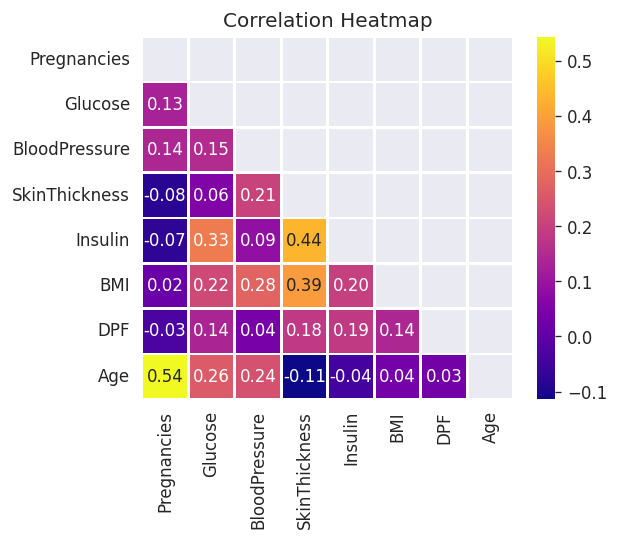

In [38]:
#Correlations using Heatmap.

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Annotations: Besides "Age x Pregnancies", which is an obvious and non-explanatory correlation, its worth saving for further analysis:

- BMI x SkinThickness
- Insulin x Skinthickness.
- BMI x Bloodpressure. 

## JointPlots

JointPlots will cross a selected variable with all others which are indicated. When set in regression mode,  the plot will show the linear association. We will proceed to Jointplot some selected variables, based on the annotations criterion.
Linear regression analysis is used to predict the value of a variable based on the value of another variable: Independent Variable x Dependent Variable.

Glucose & More Jointplot ==> 

Glucose Correlation with Pregnancies ==>  0.12945867149927248


<Figure size 800x600 with 0 Axes>

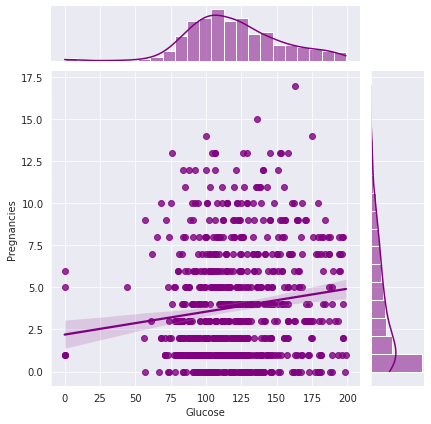

Glucose Correlation with BloodPressure ==>  0.1525895865686646


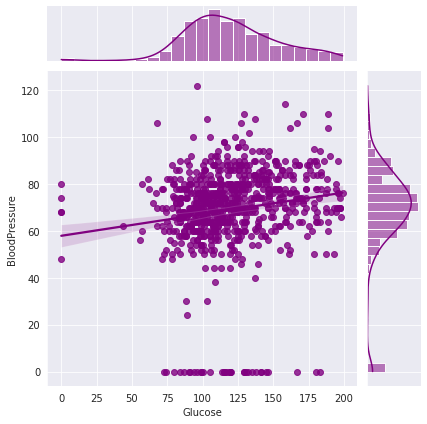

Glucose Correlation with SkinThickness ==>  0.05732789073817692


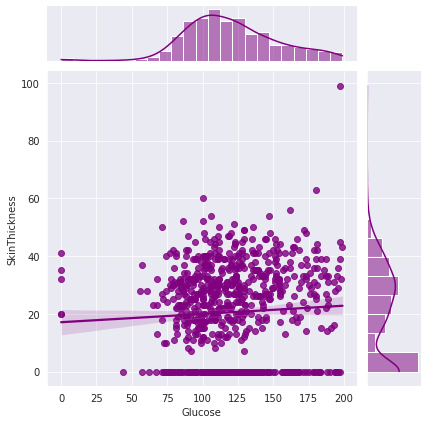

Glucose Correlation with Insulin ==>  0.3313571099202092


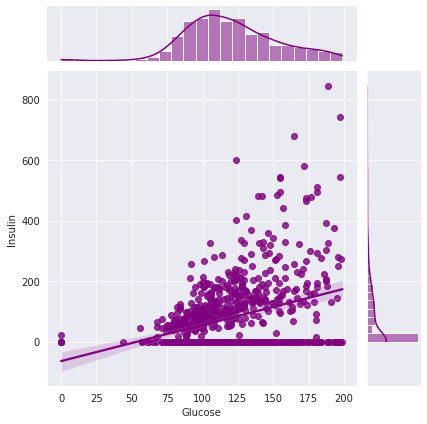

Glucose Correlation with BMI ==>  0.2210710694589828


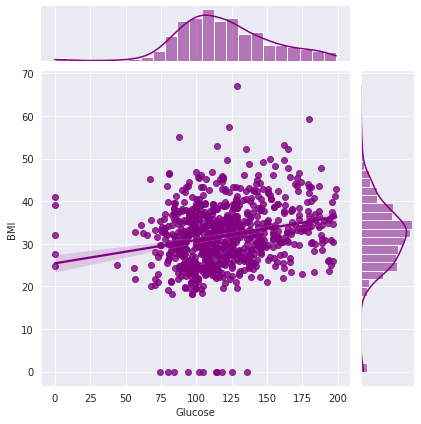

Glucose Correlation with DPF ==>  0.13733729982837092


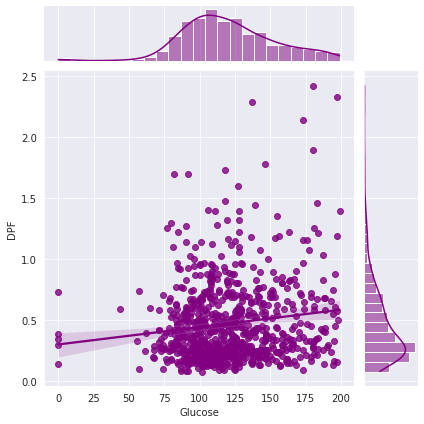

Glucose Correlation with Age ==>  0.26351431982433343


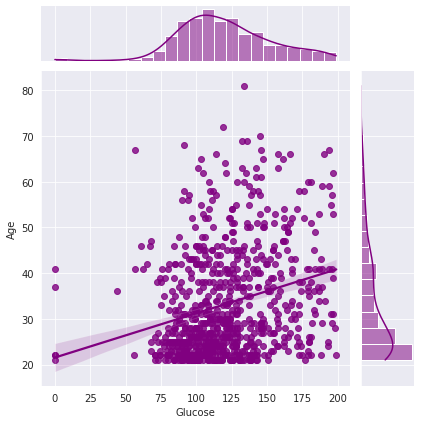

In [39]:
# Glucose JoinPlot

plt.figure(dpi = 100, figsize = (8,6))
print("Glucose & More Jointplot ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Glucose Correlation with {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'reg',color = 'purple')
        plt.show()

**Insight**: Glucose shows a weak positive linear association with the other variables in the data set. That means that by increasing the glucose level in patients, the other variables will also increase.

BloodPressure Jointplot with other variables ==> 

Correlacion of BloodPressure and SkinThickness ==>  0.2073705384030709


<Figure size 1000x800 with 0 Axes>

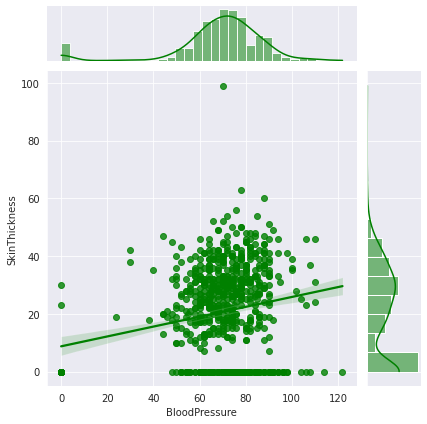

Correlacion of BloodPressure and Insulin ==>  0.08893337837319314


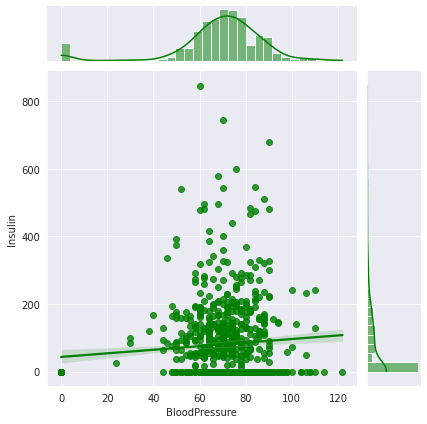

Correlacion of BloodPressure and BMI ==>  0.2818052888499109


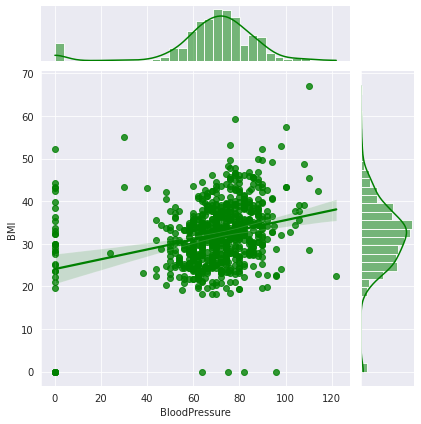

Correlacion of BloodPressure and DPF ==>  0.04126494793009856


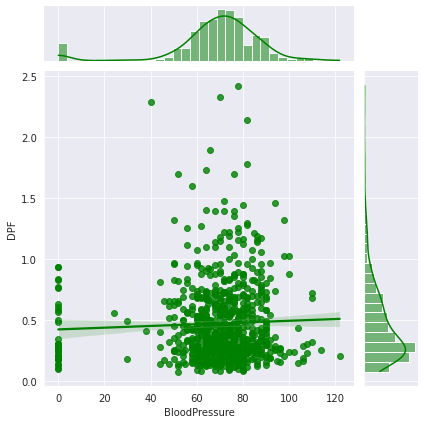

Correlacion of BloodPressure and Age ==>  0.23952794642136344


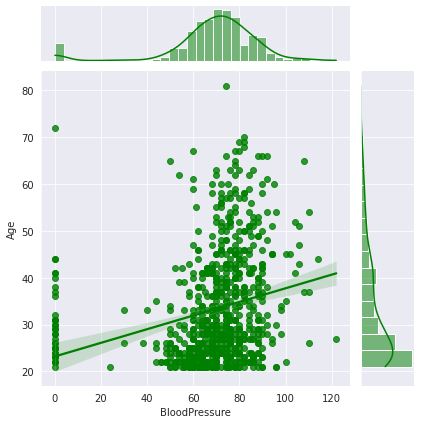

In [40]:
# BloodPressure Jointplot

col = list(df.columns)
idx = col.index('BloodPressure')

plt.figure(dpi = 100, figsize = (10,8))
print("BloodPressure Jointplot with other variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion of BloodPressure and {col[i]} ==> ",df.corr().loc['BloodPressure'][col[i]])
    sns.jointplot(x='BloodPressure',y=col[i],data=df,kind = 'reg',color = 'green')
    plt.show()

**Insight**: BloodPressure shows a weak positive linear association with the other variables in the given data set. This means that by increasing the level of BP in patients, the rest of the variables will also increase.

SkinThickness Jointplot with variables ==> 

Correlation of SkinThickness y Insulin ==>  0.43678257012001326


<Figure size 500x400 with 0 Axes>

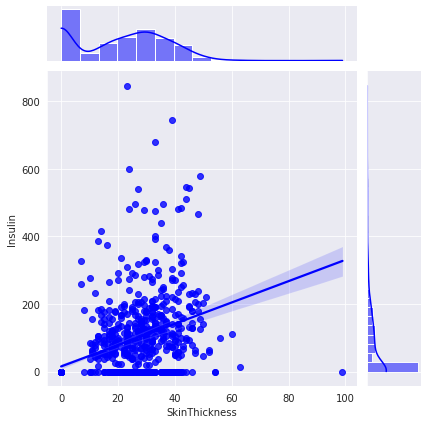

Correlation of SkinThickness y BMI ==>  0.39257320415903835


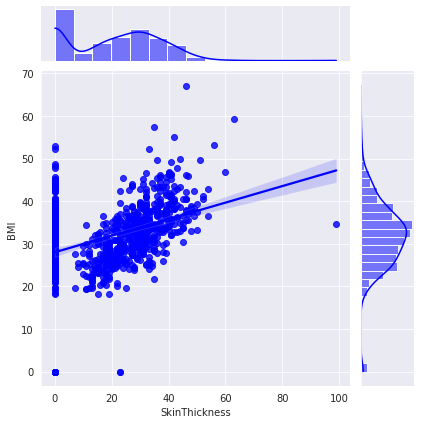

Correlation of SkinThickness y DPF ==>  0.1839275729541631


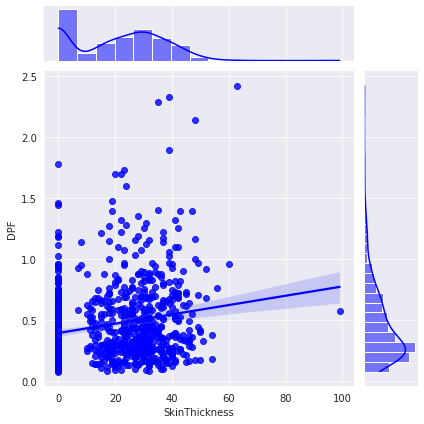

Correlation of SkinThickness y Age ==>  -0.11397026236774152


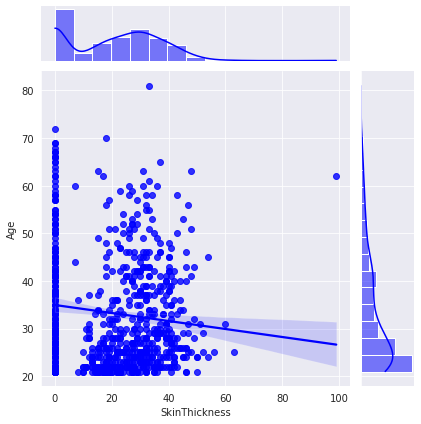

In [41]:
# SkinThickness Jointplot

col = list(df.columns)
idx = col.index('SkinThickness')

plt.figure(dpi = 100, figsize = (5,4))
print("SkinThickness Jointplot with variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation of SkinThickness y {col[i]} ==> ",df.corr().loc['SkinThickness'][col[i]])
    sns.jointplot(x='SkinThickness',y=col[i],data=df,kind = 'reg',color = 'blue')
    plt.show()

**Insight**: SkinThickness shows a positive weak linear association with the rest of the variables, except for age. That means that as SkinThickness increases in patients, the other variables will also increase. SkinThickness with age show a weak negative correlation, that is, as SkinThickness increases, age will decrease.